In [1]:
#!pip install pygenomeviz
#!sudo apt install ncbi-blast+ mummer mmseqs2

In [2]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset, ColorCycler, is_pseudo_feature
from pygenomeviz.align import MUMmer
ColorCycler.set_cmap("tab10")

In [3]:
gbk_files=load_example_genbank_dataset("yersinia_phage")
gbk=Genbank(gbk_files[0])
print(gbk_files)
print(gbk)
gbk_plants = ["/media/crowfoot2/DATOS/CHALCO/eproceso/genomes/chlamydomonas.gbff", "/media/crowfoot2/DATOS/CHALCO/eproceso/genomes/cuscuta.gbff"]
gbk_gor=["/media/crowfoot2/DATOS/CHALCO/eproceso/genomes/gorgonias_processed.gb"]

gbkp=Genbank(gbk_plants[1])
gbkg=Genbank(gbk_gor[0])

[PosixPath('/home/crowfoot2/.cache/pygenomeviz/genbank/yersinia_phage/NC_070914.gbk'), PosixPath('/home/crowfoot2/.cache/pygenomeviz/genbank/yersinia_phage/NC_070915.gbk'), PosixPath('/home/crowfoot2/.cache/pygenomeviz/genbank/yersinia_phage/NC_070916.gbk'), PosixPath('/home/crowfoot2/.cache/pygenomeviz/genbank/yersinia_phage/NC_070918.gbk')]
NC_070914: 1 records
01. NC_070914.1 (30,280 bp)



In [ ]:
#print(gbkp)
print(gbkg)

gorgonias_processed: 20615 records
01. 1 (6,812 bp)
02. 100 (6,014 bp)
03. 10010 (1,608 bp)
04. 10042 (1,689 bp)
05. 10047 (1,043 bp)
06. 101 (16,355 bp)
07. 1017 (2,677 bp)
08. 102 (4,382 bp)
09. 10207 (1,045 bp)
10. 1022 (3,354 bp)
11. 103 (3,001 bp)
12. 1038 (2,761 bp)
13. 104 (7,730 bp)
14. 10431 (1,923 bp)
15. 105 (33,022 bp)
16. 10533 (1,240 bp)
17. 10556 (1,110 bp)
18. 10593 (1,216 bp)
19. 106 (13,554 bp)
20. 107 (8,612 bp)
21. 1074 (4,208 bp)
22. 108 (48,758 bp)
23. 109 (9,119 bp)
24. 110 (12,436 bp)
25. 11068 (1,004 bp)
26. 111 (10,525 bp)
27. 112 (47,478 bp)
28. 11288 (1,111 bp)
29. 11289 (1,112 bp)
30. 113 (7,157 bp)
31. 1138 (3,031 bp)
32. 11392 (1,424 bp)
33. 114 (3,591 bp)
34. 11406 (1,407 bp)
35. 115 (4,099 bp)
36. 116 (33,237 bp)
37. 11605 (1,012 bp)
38. 1169 (4,906 bp)
39. 117 (5,462 bp)
40. 118 (68,921 bp)
41. 119 (20,933 bp)
42. 11901 (1,077 bp)
43. 11903 (1,108 bp)
44. 11959 (1,603 bp)
45. 11962 (1,115 bp)
46. 120 (8,418 bp)
47. 1206 (1,740 bp)
48. 12077 (1,346 bp)


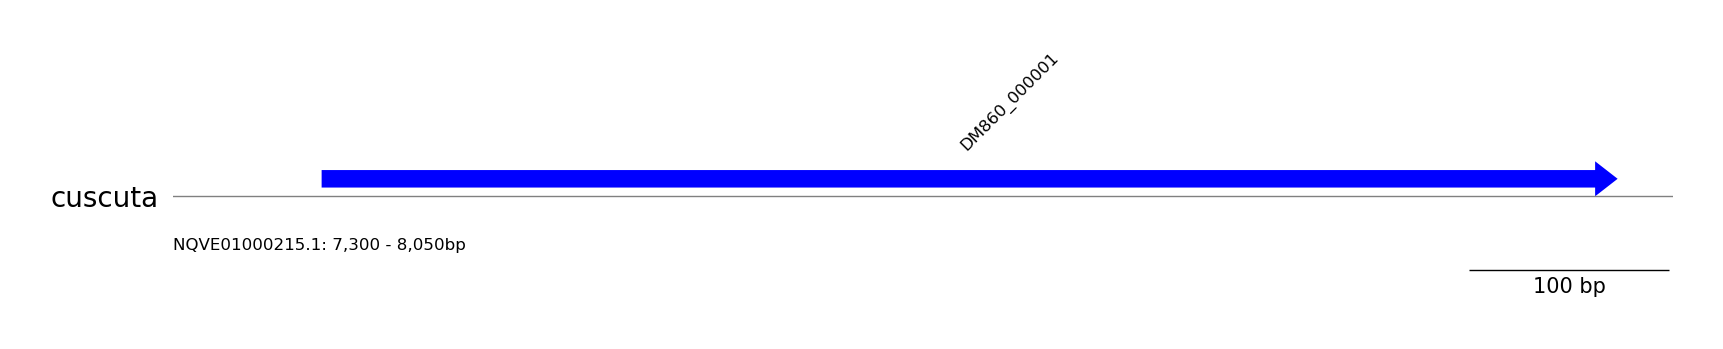

In [ ]:
gvp=GenomeViz(fig_track_height=0.7)
gvp.set_scale_bar(ymargin=0.5)
target_ranges=[(1000000,1900000)]
#track=gvp.add_feature_track(gbkp.name,dict(list(gbkp.get_seqid2size().items())[:1]),space=0.03)
#track=gvp.add_feature_track(gbkp.name,space=0.03, segments={"NC_057004.1": (50000, 100000),"NC_057005.1": (800000,1200000)})
track=gvp.add_feature_track(gbkp.name,space=0.03, segments={"NQVE01000215.1": (7300, 8050)})



color=ColorCycler()
for segment in track.segments:
    features = gbkp.get_seqid2features(feature_type=None)[segment.name]
    segment.add_sublabel(f"{segment.name}: {segment.start:,} - {segment.end:,}bp")
    for feature in features:
        feature_start = feature.location.start
        feature_end = feature.location.end
        # Verifica si la característica está dentro del rango del segmento
        if segment.start <= feature_start <= segment.end and segment.start <= feature_end <= segment.end:
            if feature.type=="gene":
                color ="grey" if is_pseudo_feature(feature) else "blue"
                segment.add_features(feature, color =color,label_type="locus_tag")
            elif feature.type=="rRNA":
                segment.add_features(feature, color ="lime")

        
fig = gvp.plotfig()

In [ ]:
#track.segments
#dict(list(gbkp.get_seqid2size().items())[:1])
#gbkp.get_seqid2features()
#gbkg.get_seqid2features(feature_type=None)['80437'].qualifiers
target_feature = None

for segment in list(gbkg.get_seqid2size().keys()):
    for feature in gbkg.get_seqid2features(feature_type=None)[segment]:
        print(feature)
        if 'ID' in feature.qualifiers and 'rgor_18659-RA' in feature.qualifiers['ID']:
            target_feature = feature
            break  # Rompe el bucle interno si encuentra la característica
    if target_feature:
        break  # Rompe el bucle externo si se encontró la característica
#gbkp.get_seqid2features(feature_type=None)['NQVE01000097.1'][13].qualifiers


type: contig
location: [0:6812](+)
qualifiers:
    Key: ID, Value: ['1']
    Key: Name, Value: ['1']

type: match
location: [369:407](+)
qualifiers:
    Key: ID, Value: ['1:hit:0:1.3.0.0']
    Key: Name, Value: ['species:GA-rich|genus:Low_complexity']
    Key: Target, Value: ['species:GA-rich|genus:Low_complexity 1 38 +']
    Key: score, Value: ['18']
    Key: source, Value: ['repeatmasker']

type: match_part
location: [369:407](+)
qualifiers:
    Key: ID, Value: ['1:hsp:0:1.3.0.0']
    Key: Parent, Value: ['1:hit:0:1.3.0.0']
    Key: Target, Value: ['species:GA-rich|genus:Low_complexity 1 38 +']
    Key: score, Value: ['18']
    Key: source, Value: ['repeatmasker']

type: match
location: [0:2324](+)
qualifiers:
    Key: ID, Value: ['1:hit:1:1.3.0.0']
    Key: Name, Value: ['species:rnd-1_family-5|genus:Unknown']
    Key: Target, Value: ['species:rnd-1_family-5|genus:Unknown 471 1466 +']
    Key: score, Value: ['6441']
    Key: source, Value: ['repeatmasker']

type: match_part
location

In [7]:
#gbkg.get_seqid2features(feature_type=None)['80437']
features = gbkg.get_seqid2features(feature_type=None)['80437']

# Filtrar la característica con el ID específico
for feature in features:
    if 'ID' in feature.qualifiers and 'rgor_18659-RA' in feature.qualifiers['ID']:
        print(feature)
        break

type: mRNA
location: [564:4040](+)
qualifiers:
    Key: Alias, Value: ['augustus_masked-80437-processed-gene-0.8-mRNA-1']
    Key: ID, Value: ['rgor_18659-RA']
    Key: Name, Value: ['rgor_18659-RA']
    Key: Parent, Value: ['rgor_18659']
    Key: _AED, Value: ['0.13']
    Key: _QI, Value: ['0|0|0|0.75|1|1|4|0|313']
    Key: _eAED, Value: ['0.24']
    Key: source, Value: ['maker']

